# Bank Customer Churn Machine Learning Project

The purpose of this notebook is to analyse [Bank Customer Data](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data) and predict customer churn. Customer retention should be key factory to stay competitive in the market. For banks, it can help to identify `big profile` customers and avoid them from churning.

# Data and Libraries import

### Libraries for data import and EDA stage

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
%matplotlib inline

### Importing dataset

In [16]:
bank_churn_data = pd.read_csv("Bank Customer Churn Prediction.csv")
bank_churn_data.shape

(10000, 12)

As it was in Kaggles description, there are total **12** columns and **10000** rows of data. Upload was successful.

Let's check some information about the data types each column holds

In [17]:
bank_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


One thing that we can notice straight away, there is no `null-values`. It means we will not have to impute missing values in this case. There still might be some data manipulation if there are outliers or data that is not feasible.

In [18]:
bank_churn_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
credit_score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


We can already indicate, that `customer_id` can be dropped (after check of dublicating IDs), remaining columns will have to be investigated for outliers.

In [19]:
bank_churn_data["customer_id"].duplicated().sum()

np.int64(0)

In [20]:
bank_churn_data = bank_churn_data.drop(columns=["customer_id"])

Let's check the object columns and frequency values appear.

In [21]:
bank_churn_data.describe(include=["object"]).T

,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457


For gender, it is clear that `Male`/`Female` are the options, but for country we can currently see `France`. Let's look what remaining two countries are.

In [22]:
bank_churn_data["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Other coountries are `Spain` and `Germany`.

Before **EDA** stage, let's quickly look into outliers and maybe we will see something strange that should be removed.

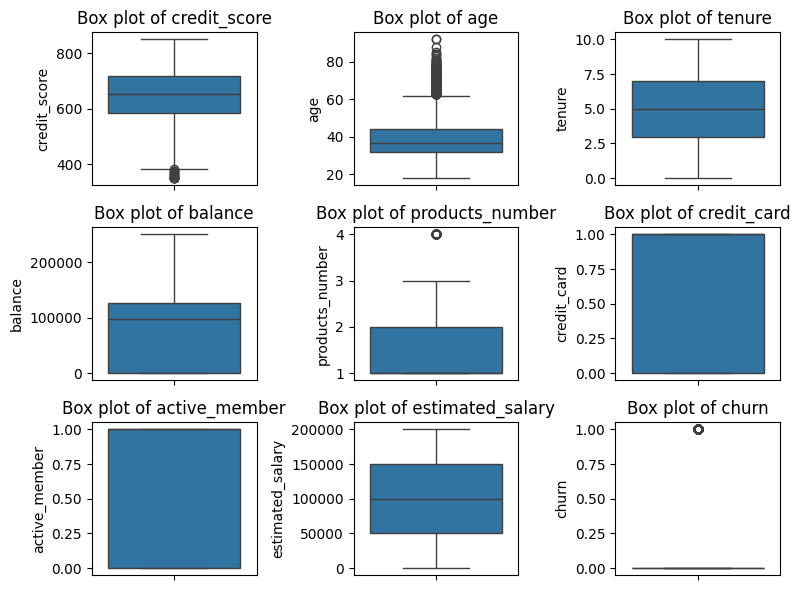

In [23]:
plt.figure(figsize=(8,6))

for i, column in enumerate(bank_churn_data.select_dtypes(include=["float64","int64"]).columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=bank_churn_data[column])
    plt.title(f"Box plot of {column}")

plt.tight_layout()
plt.show()

`Credit_score`/`Age`/`product_number` all have outliers:
- For `credit_score` we can see that outliers are below 400. Credit score rating is this:
    - Excellent: 800–850
    - Very Good: 740–799
    - Good: 670–739
    - Fair: 580–669
    - Poor: 300–579
    It can indicate that we have various customers in all credit score groups, but outliers fall into *Poor* category.
- `Age` outliers look feasible as customer age can vary and elder customers can easily use banking service.
- `Product_number` outliers we see that not many of customers use more than 2 products so someone using all 4 is a logical outlier.


# EDA
    Exploratory Data Analysis

### Age


Let's check how `age` compares with `churned` customers

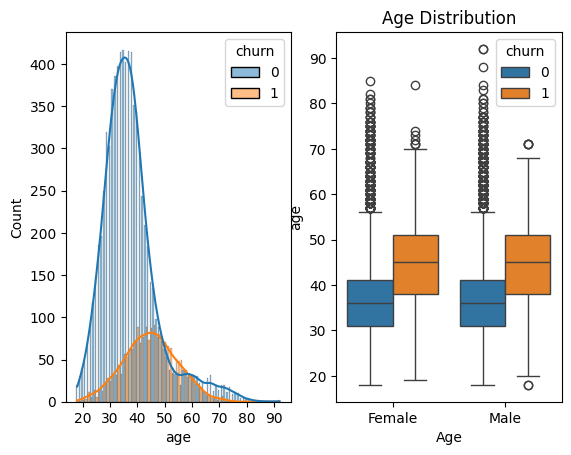

In [24]:
age_fig, age_ax = plt.subplots(1,2)
age_distribution = sns.histplot(data=bank_churn_data, x="age",
                                hue="churn",
                                bins=20,
                                multiple="dodge",
                                discrete=True,
                                stat="count",
                                kde=True,
                                ax=age_ax[0])
sns.boxplot(data=bank_churn_data, x="gender", y="age", hue="churn", ax=age_ax[1])
age_distribution.xaxis.set_major_locator(tck.MultipleLocator(10))
plt.xlabel("Age")
plt.title("Age Distribution");

We can see that majority of our customers are between age **25** and **45** while `churned` customers can be seen more in range of **35-55**.

When looking at `gender`, we can see that churned and retained customers have very close graph, so gender might not be a factor in this case at first glance.

### Credit Score

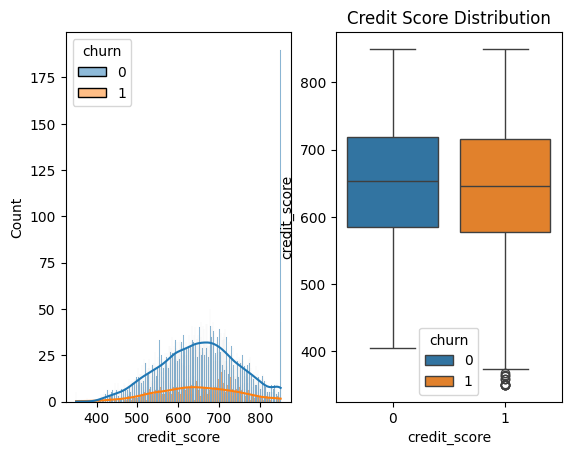

In [25]:
credit_score_fig, credit_score_ax = plt.subplots(1,2)
credit_score_distribution = sns.histplot(data=bank_churn_data, x="credit_score",
                                hue="churn",
                                bins=20,
                                multiple="dodge",
                                discrete=True,
                                stat="count",
                                kde=True,
                                ax=credit_score_ax[0])
sns.boxplot(data=bank_churn_data, x="churn", y="credit_score", hue="churn", ax=credit_score_ax[1])
credit_score_distribution.xaxis.set_major_locator(tck.MultipleLocator(100))
plt.xlabel("credit_score")
plt.title("Credit Score Distribution");

Looking at `credit_score` and `churn`, we see that churning customers tend to have a bit lower score. Of course low-score outliers are only from churned customers.

### Country

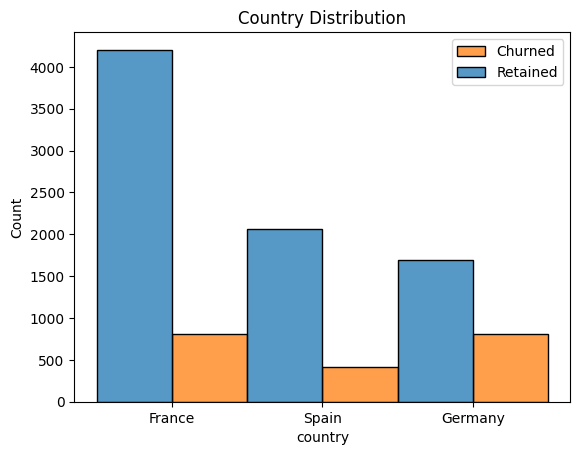

In [26]:
country_fig= sns.histplot(data=bank_churn_data, x="country",
                                hue="churn",
                                bins=20,
                                multiple="dodge",
                                discrete=True,
                                stat="count",
                                )
plt.legend(labels=["Churned","Retained"])
plt.title("Country Distribution");

Quick look at each country and how our customers devide between these, we can see France having a majority.

Interesting thing to notice is Germany having least retained customers but highest amount of churned customers.

### Tenure

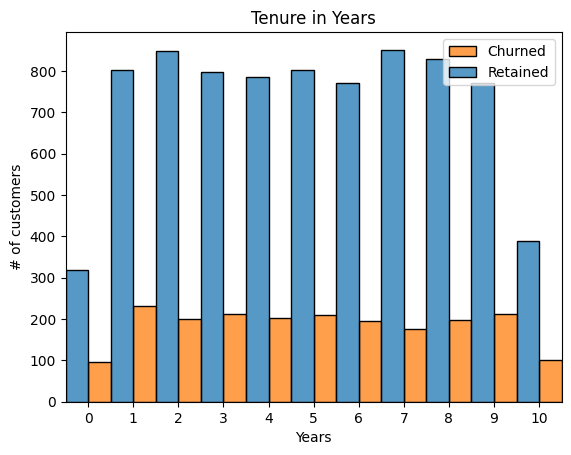

In [27]:
tenure_fig= sns.histplot(data=bank_churn_data, x="tenure",
                                hue="churn",
                                bins=20,
                                multiple="dodge",
                                discrete=True,
                                stat="count",
                                )
plt.xlim(-0.5,10.5)
tenure_fig.xaxis.set_major_locator(tck.MultipleLocator(1))
plt.legend(labels=["Churned","Retained"])
plt.xlabel("Years")
plt.ylabel("# of customers")
plt.title("Tenure in Years");

We have lowest # of customers that started in **current year** and those who retained with us for **10 years**. Customers of tenure between 1-9, have similar numbers while also churn amount is similar to between the years.

### Balance

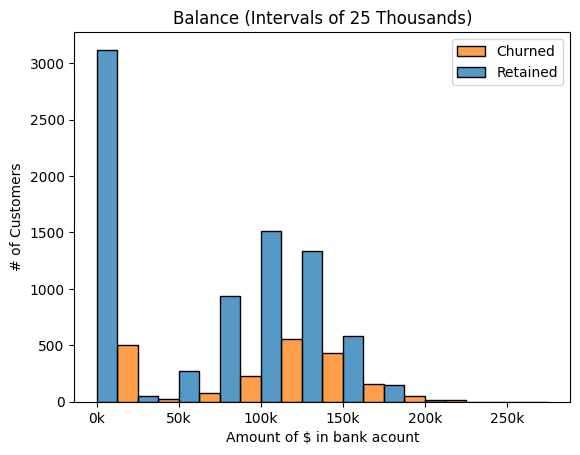

In [34]:
bin_edges = np.arange(0,bank_churn_data["balance"].max()+25000,25000)
balance_fig= sns.histplot(data=bank_churn_data, x="balance",
                                hue="churn",
                                bins=bin_edges,
                                multiple="dodge",
                                discrete=False,
                                stat="count",
                                )
balance_fig.xaxis.set_major_formatter(tck.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
plt.legend(labels=["Churned","Retained"])
plt.xlabel("Amount of $ in bank acount")
plt.ylabel("# of Customers")
plt.title("Balance (Intervals of 25 Thousands)");

A lot of our customers have `balance` between **$0 and $25 000**. We can see another range of customers that have more than **$75 000** and less than **$150 000**

### Products Used

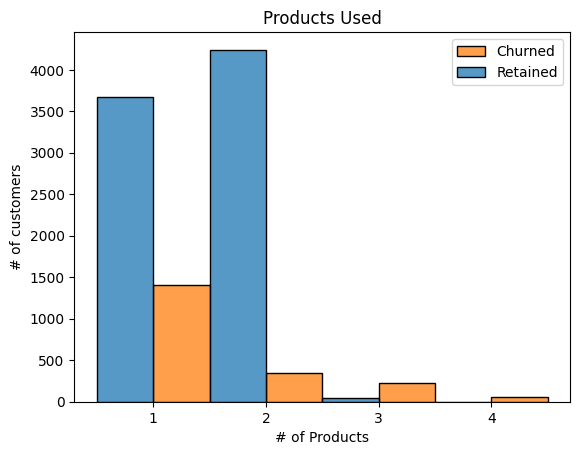

In [37]:
products_fig= sns.histplot(data=bank_churn_data, x="products_number",
                                hue="churn",
                                multiple="dodge",
                                discrete=True,
                                stat="count",
                                )
products_fig.xaxis.set_major_locator(tck.MultipleLocator(1))
plt.legend(labels=["Churned","Retained"])
plt.xlabel("# of Products")
plt.ylabel("# of customers")
plt.title("Products Used");

We see a tendancy here that customers using **3** or **4** products have left compared to retained ones. While successful retention can be seen when customers have at least **2** products that we offer.

### Credit Card

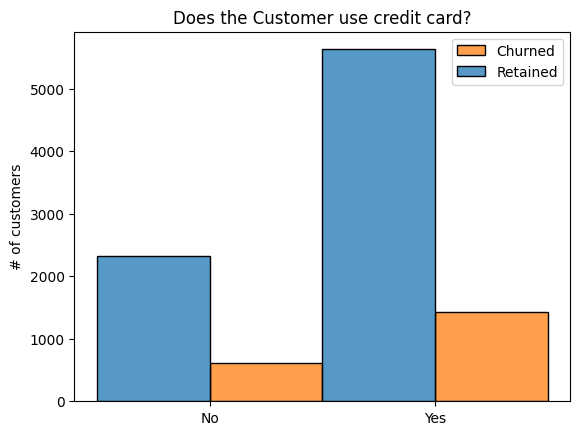

In [46]:
credit_card_fig= sns.histplot(data=bank_churn_data, x="credit_card",
                                hue="churn",
                                multiple="dodge",
                                discrete=True,
                                stat="count",
                                )
credit_card_fig.xaxis.set_major_locator(tck.MultipleLocator(1))
credit_card_fig.set_xticks([0,1])
credit_card_fig.set_xticklabels(["No", "Yes"])
plt.legend(labels=["Churned","Retained"])
plt.xlabel("")
plt.ylabel("# of customers")
plt.title("Does the Customer use credit card?");

At first glance, `credit card` does not affect too much of churning customers.

### Correlations and multicollinearity

First, we can check for correlation between numeric values.

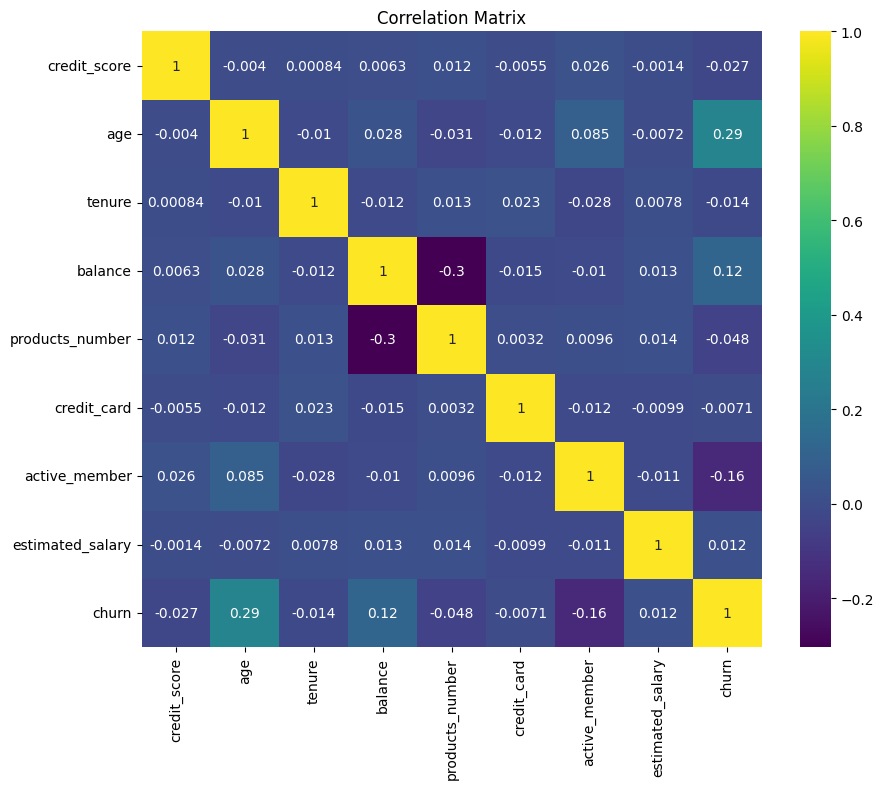

In [56]:
numeric_data = bank_churn_data.select_dtypes(include=["float64","int64"])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix");

From correlation, we can notice that there are no **strong positive/negative** correlations. There is a negative correlation between `balance` and `# of products` customer uses.

For `churned` customers, we can see that highest impact has `age` and then `balance`. While for `retention`, we can look at negative values of `churn` and see that `active_members` and `products_number` impact these customers.

### Multicollinearity


For this step, we will import few more libraries and use `variance inflation factor (VIF)`.

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [58]:
X = add_constant(numeric_data)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature        VIF
0             const  80.392721
1      credit_score   1.001533
2               age   1.110301
3            tenure   1.001915
4           balance   1.116342
5   products_number   1.103402
6       credit_card   1.001105
7     active_member   1.046479
8  estimated_salary   1.000989
9             churn   1.145213


As our VIF scores are very close to **1**, it indicates we do not have multicollinearity issue.

# ML Model

### Brief Introduction

In this part, I will have to change `gender` and `country` features to binary ones:
- For `gender` it is easy because I will choose `F` (for Female) and if customer is female, it will have **1** and for Male it will be **0**;
- For `country` it is a bit tricky, but I will create dummy variables. As we only have 3 countries, I will have 3 different new columns with similar logic to `gender` - **Spain**,**France** and **Germany** will have a seperate column and if customer is from that country, it will show **1**, if not - **0**.

Another step - after **`train/test`** split, I standardize the scale for each variable so our `logistic regression` model can easier understand data. Standartization happens after the split, because it helps to keep test set part untouched and not influenced from whole dataset.

Last step before fitting the model on test set - run cross-validation on train dataset and then adjust the model.